<a href="https://colab.research.google.com/github/marciodbotas/MachineLearning/blob/main/2_4_11_Question_arrozFeijao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bean Disease Classifier
For this assignment you'll take what you've learned so far and build a classifier for bean disease. You'll be provided with training and validation data based on 224x224 pixel color images taken of bean plants in Uganda. These images show healthy bean leaves as well as 2 types of common disease: bean rust and angular leaf spots. Your job will be to build a neural network that can tell the difference between the healthy and diseased leaves.

We start by setting up the problem for you.

In [ ]:
# Do not change this code
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Do not change this code
!pip install --upgrade --no-cache-dir gdown

In [ ]:
# Do not change this code
!gdown "https://storage.googleapis.com/learning-datasets/beans/train.zip" -O /tmp/train.zip
!gdown "https://storage.googleapis.com/learning-datasets/beans/validation.zip" -O /tmp/validation.zip
!gdown "https://storage.googleapis.com/learning-datasets/beans/test.zip" -O /tmp/test.zip

Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/train.zip
To: /tmp/train.zip
100% 144M/144M [00:00<00:00, 286MB/s]
Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/validation.zip
To: /tmp/validation.zip
100% 18.5M/18.5M [00:00<00:00, 186MB/s]
Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/test.zip
To: /tmp/test.zip
100% 17.7M/17.7M [00:00<00:00, 150MB/s]


In [ ]:
# Do not change this code
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/test')
zip_ref.close()

Now you need to define a generator to process the data we have loaded in Colab so that our model can use it for training. As we showed in the previous video you'll first have to define an ```ImageDataGenerator``` and then flow the data into it.

*A hint: You don't want abnormal data!*

# **Modelo arroz com feijao**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      # YOUR CODE HERE #
      rescale=1./255
)

validation_datagen = ImageDataGenerator(
      # YOUR CODE HERE #
      rescale=1./255
)

TRAIN_DIRECTORY_LOCATION = '/tmp/train' # YOUR CODE HERE #
VAL_DIRECTORY_LOCATION = '/tmp/validation' # YOUR CODE HERE #
TARGET_SIZE = (224, 224) # YOUR CODE HERE #
CLASS_MODE = 'categorical' # YOUR CODE HERE #

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.


Now its your turn to define a model to learn this data.

*A hint: Like with the CIFAR-10 assignment, your model may want to learn some high level features and then classify them. This time it may help to make the model a little wider at times.*

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    #YOUR CODE HERE#
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# This will print a summary of your model when you're done!
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,536,675 (36.38 MB)

 Trainable params: 9,536,675 (36.38 MB)

 Non-trainable params: 0 (0.00 B)

Then you'll need to pick an appropriate loss function and optimizer.

*A hint: remember we are classifying again.*

In [ ]:
LOSS_FUNCTION = 'categorical_crossentropy'
OPTIMIZER = 'adam'

model.compile(
    loss = LOSS_FUNCTION,
    optimizer = OPTIMIZER,
    metrics = ['accuracy']
)

Finally select the number of epochs you'd like to train for and train your model!

*A hint: something in the low tens is a good place to start*

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.3481 - loss: 1.2281 - val_accuracy: 0.5038 - val_loss: 1.0233
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 537ms/step - accuracy: 0.5316 - loss: 0.9854 - val_accuracy: 0.6241 - val_loss: 0.8163
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 527ms/step - accuracy: 0.6667 - loss: 0.8056 - val_accuracy: 0.6316 - val_loss: 0.7765
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 561ms/step - accuracy: 0.6849 - loss: 0.7166 - val_accuracy: 0.5865 - val_loss: 0.9150
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 588ms/step - accuracy: 0.6918 - loss: 0.7099 - val_accuracy: 0.6541 - val_loss: 0.7902
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 596ms/step - accuracy: 0.6715 - loss: 0.7488 - val_accuracy: 0.6842 - val_loss: 0.6818
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 504ms/step - accuracy: 0.7505 - loss: 0.5987 - val_accuracy: 0.7143 - val_loss: 0.6264
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 541ms/step - accuracy: 0.7337 - loss: 0.5849 - val_accuracy: 0.6917 - val_loss: 0

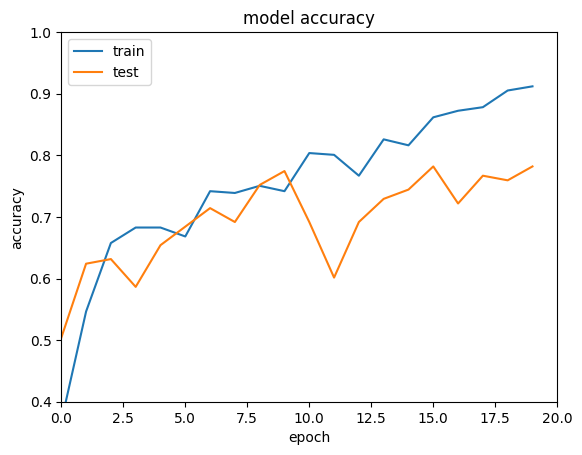

In [ ]:
NUM_EPOCHS = 20 #YOUR CODE HERE#

history = model.fit(
      train_generator,
      epochs = NUM_EPOCHS,
      verbose = 1,
      validation_data = validation_generator)

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

# **Modelo refinado blaster**

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.3504 - loss: 1.2559 - val_accuracy: 0.3534 - val_loss: 1.0816 - learning_rate: 0.0010
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.3880 - loss: 1.0762 - val_accuracy: 0.4211 - val_loss: 1.0769 - learning_rate: 0.0010
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.5083 - loss: 1.0167 - val_accuracy: 0.6316 - val_loss: 0.8777 - learning_rate: 0.0010
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.5819 - loss: 0.9043 - val_accuracy: 0.5714 - val_loss: 0.8789 - learning_rate: 0.0010
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.5890 - loss: 0.8818 - val_accuracy: 0.5865 - val_loss: 0.9018 - learning_rate: 0.0010
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6225 - loss: 0.8585 - val_accuracy: 0.6541 - val_loss: 0.7572 - learning_rate: 0.0010
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.6636 - loss: 0.7942 - val_accuracy: 0.6015 - val_l

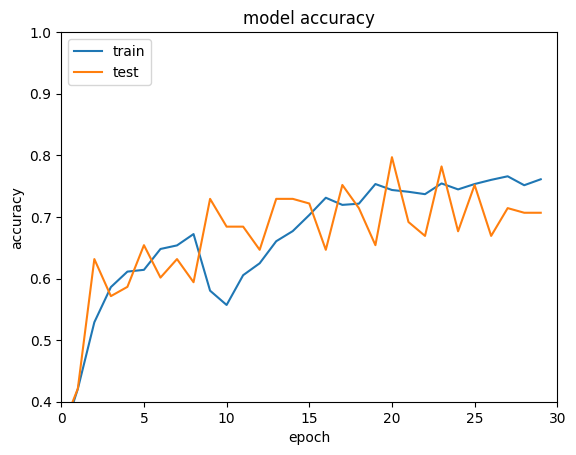

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)

validation_datagen = ImageDataGenerator(
      # YOUR CODE HERE #
      rescale=1./255
)

TRAIN_DIRECTORY_LOCATION = '/tmp/train' # YOUR CODE HERE #
VAL_DIRECTORY_LOCATION = '/tmp/validation' # YOUR CODE HERE #
TARGET_SIZE = (224, 224) # YOUR CODE HERE #
CLASS_MODE = 'categorical' # YOUR CODE HERE #

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

import tensorflow as tf
model = tf.keras.models.Sequential([
    #YOUR CODE HERE#
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

# This will print a summary of your model when you're done!
#model.summary()

LOSS_FUNCTION = 'categorical_crossentropy'
OPTIMIZER = 'adam'

model.compile(
    loss = LOSS_FUNCTION,
    optimizer = OPTIMIZER,
    metrics = ['accuracy']
)
NUM_EPOCHS = 30 #YOUR CODE HERE#

# Callback para reduzir a learning rate automaticamente se necessário
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)  # Sugestão: callback para ajuste dinâmico da learning rate


history = model.fit(
      train_generator,
      epochs = NUM_EPOCHS,
      verbose = 1,
      validation_data = validation_generator,
      callbacks=[reduce_lr])

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

In [ ]:

# Após treinar e salvar seu modelo, carregue o modelo treinado:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Carregue o modelo treinado (ajuste o caminho se necessário)
model.save('my_trained_modelBlaster.h5')  # Salve após o treinamento, se ainda não fez
model = load_model('my_trained_modelBlaster.h5')

# Diretório com imagens para testar
test_datagen = ImageDataGenerator(
    rescale=1./255
)

test_DIRECTORY_LOCATION = '/tmp/test/test' # YOUR CODE HERE #
TARGET_SIZE = (224, 224) # YOUR CODE HERE #
CLASS_MODE = 'categorical' # YOUR CODE HERE #

test_generator = test_datagen.flow_from_directory(
    test_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)


# Predição no conjunto de teste
preds = model.predict(test_generator)
predicted_classes = np.argmax(preds, axis=1)

# Obtenha os nomes dos arquivos e classes verdadeiras
filenames = test_generator.filenames
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Calcule a acurácia
correct = np.sum(predicted_classes == true_classes)
total = len(true_classes)
accuracy = correct / total * 100

print(f"\nTest accuracy: {accuracy:.2f}%\n")

# Exibir resultados individuais
for i in range(len(filenames)):
    print(f"Image: {filenames[i]} - True class: {class_labels[true_classes[i]]} - Predicted class: {class_labels[predicted_classes[i]]} - Probabilities: {preds[i]}")


Found 128 images belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step

Test accuracy: 28.91%

Image: angular_leaf_spot/angular_leaf_spot_test.0.jpg - True class: angular_leaf_spot - Predicted class: healthy - Probabilities: [0.00317607 0.00657052 0.9902534 ]
Image: angular_leaf_spot/angular_leaf_spot_test.1.jpg - True class: angular_leaf_spot - Predicted class: angular_leaf_spot - Probabilities: [0.5739384  0.15316096 0.27290058]
Image: angular_leaf_spot/angular_leaf_spot_test.10.jpg - True class: angular_leaf_spot - Predicted class: healthy - Probabilities: [0.02992694 0.06178094 0.9082921 ]
Image: angular_leaf_spot/angular_leaf_spot_test.11.jpg - True class: angular_leaf_spot - Predicted class: bean_rust - Probabilities: [7.158400e-03 9.928376e-01 3.996025e-06]
Image: angular_leaf_spot/angular_leaf_spot_test.12.jpg - True class: angular_leaf_spot - Predicted class: healthy - Probabilities: [8.4252597e-04 1.0819052e-03 9.9807560e-01]
Image: angular_leaf_spot/angular_leaf_spo